## Softmax

데이터를 두개 이상의 그룹으로 나누기 위해 binary(logistic)을 확장한 모델이다.
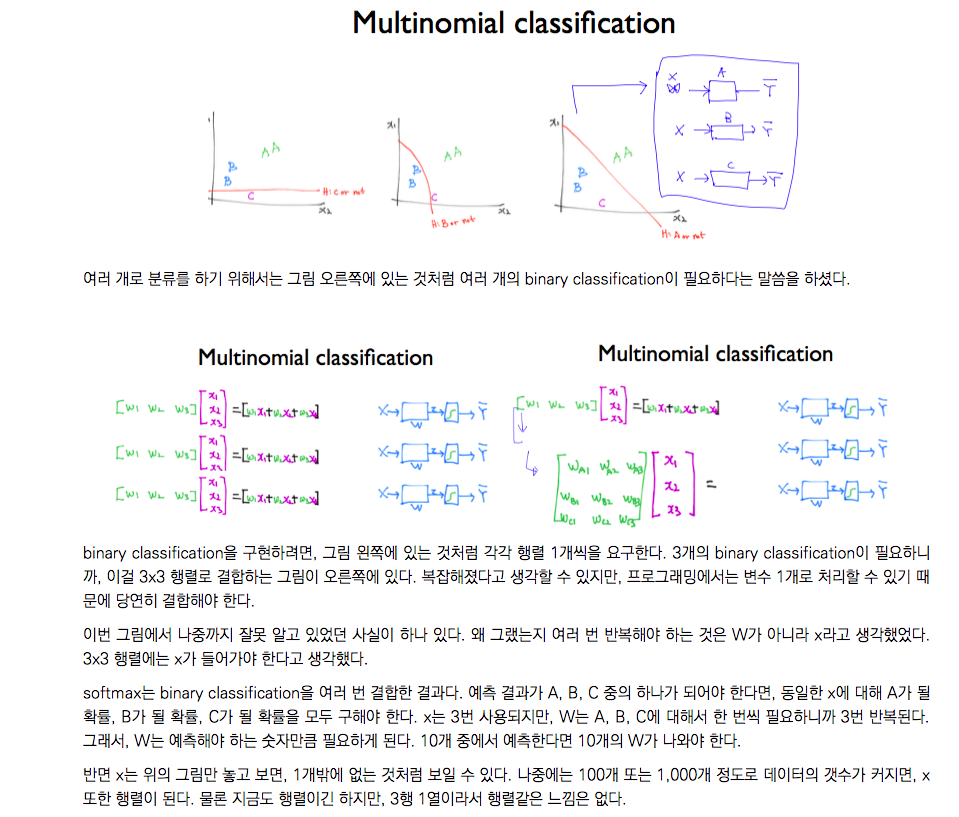

모든 경우에 대한 확률을 계산하고, 그 중에서 가장 큰 값을 가장 유력한 값이라고 예측한다.

In [1]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

In [2]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [3]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3
#nb_classes: how many classes(labels)?

In [4]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [5]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    print('--------------')

    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')

    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')

    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 5.048624
200 0.5484252
400 0.43214852
600 0.3524663
800 0.2768294
1000 0.23268294
1200 0.21055308
1400 0.19221492
1600 0.17675184
1800 0.16353412
2000 0.15210836
--------------
[[1.3890432e-03 9.9860197e-01 9.0612402e-06]] [1]
--------------
[[0.93119204 0.06290206 0.00590588]] [0]
--------------
[[1.2732767e-08 3.3411323e-04 9.9966586e-01]] [2]
--------------
[[1.3890432e-03 9.9860197e-01 9.0612402e-06]
 [9.3119204e-01 6.2902056e-02 5.9058843e-03]
 [1.2732767e-08 3.3411323e-04 9.9966586e-01]] [1 0 2]
